# Testing CircuitQ: Flux dependency

In [1]:
import circuitq as cq

import numpy as np
import networkx as nx
import scqubits as sc
import matplotlib.pyplot as plt

## Fluxonium
### CircuitQ
#### Circuit

In [2]:
graph = nx.MultiGraph()
graph.add_edge(0,1, element = 'C')
graph.add_edge(0,1, element = 'J')
graph.add_edge(0,1, element = 'L');

#### Symbolic Hamiltonian

In [3]:
circuit = cq.CircuitQ(graph)
circuit.h_parameters

[C_{01}, E_{J010}, L_{010}, \tilde{\Phi}_{010}]

#### Diagonalization data

In [4]:
phi_ex_list = np.linspace(-1,1,100)
cq_eigv_list = []
for phi_ex in phi_ex_list/circuit.phi_0:
    parameters_list = [False, False, False, phi_ex]
    h_num = circuit.get_numerical_hamiltonian(400,parameter_values=parameters_list)
    eigv, eigs = circuit.get_eigensystem()
    cq_eigv_list.append(eigv[:10])

### SCQubit

In [5]:
EJ = circuit.c_v["E"]
EC = circuit.c_v["E_C"]
EL = (circuit.phi_0**2) / circuit.c_v["L"]
fluxonium = sc.Fluxonium(EJ = EJ, EC = EC, EL = EL, flux = 0, cutoff = 100)
spectrum = fluxonium.get_spectrum_vs_paramvals('flux', (phi_ex_list/(2*np.pi*circuit.phi_0)), evals_count=10);

### Compare

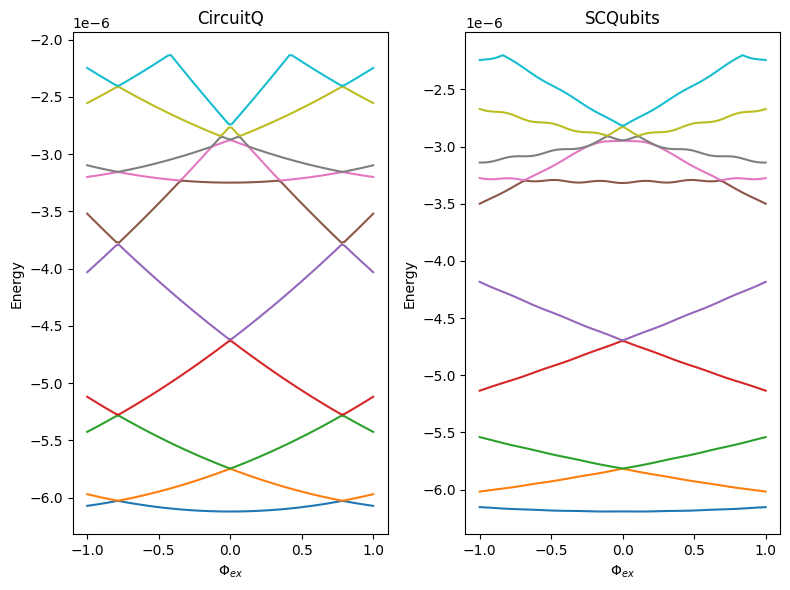

In [6]:
plt.style.use('default')
plt.figure(figsize=(8,6))
plt.subplot(121)
plt.title("CircuitQ")
plt.plot(phi_ex_list, cq_eigv_list)
plt.ticklabel_format(style='scientific', scilimits=(0, 0))
plt.xlabel(r"$\Phi_{ex}$")
plt.ylabel("Energy")
plt.subplot(122)
plt.title("SCQubits")
plt.plot(phi_ex_list, spectrum.energy_table)
plt.ticklabel_format(style='scientific', scilimits=(0, 0))
plt.xlabel(r"$\Phi_{ex}$")
plt.ylabel("Energy")
plt.tight_layout()
plt.show()